<a href="https://colab.research.google.com/github/Dave4006/LabsTeoria/blob/main/LabProyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Integrantes**
##### María Fernanda Sabatini Castro
##### David José Rodríguez Camacho

# Bibliotecas

In [64]:
# Biblioteca para crear las intefaces.
import ipywidgets as widgets
# Biblioteca para tener acceso a ciertas operacioens matemáticas.
import math
# Se importa la capacidad de limpiar la salida impresa.
from IPython.display import clear_output

import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

# Actividad 1

In [85]:
# Actividad 1.

# Creación de interfaz para actividad 1.1

# Crea un widget de TextBox para la interfaz [1].
widgetText = widgets.Text(value=' ',
                          placeholder='Type something',
                          disabled=False)

# Crea un widget de selección tipo Dropdown [2] y le pone las opciones deseadas.
widgetDropdown = widgets.Dropdown(options=['dBu','dBm','dBW'],
                                  disable=False)

widgetDropdown2 = widgets.Dropdown(options=['dBu','dBm','dBW'],
                                  disable=False)

# Crea un widget de botón [3].
widgetButton = widgets.Button(description='Obtener respuesta',
                              disabled=False,
                              tooltip='Click',
                              icon='check')

# Crea un widget de salida para poder mostrar la intefaz en el notebook.
out = widgets.Output()

# Crea el título (header) para la actividad 1.1  y le pone un estilo básico con HTML.
header = widgets.HTML("<h1>Conversión entre decibeles</h1>", layout=widgets.Layout(height='auto'))
# Alinea el título en el centro.
header.style.text_align='center'

# Utiliza el layout de App de la librería ipywidgets [4] y crea la interfaz para la actividad 1.1
widgetsAppLayout1 = widgets.AppLayout(header=header,
                                  # Pone varios elementos a la izquierda usando el widget de VBox [5].
                                  left_sidebar=widgets.VBox([widgets.Label("Unidades originales:"),
                                                widgetDropdown,
                                                widgets.Label("Unidades finales:"),
                                                widgetDropdown2]),
                                  # Pone varios elementos en el centro usando el widget de VBox.
                                  center=widgets.VBox([widgets.Label("Valor:"),
                                                widgetText,
                                                widgets.Label(" "),
                                                widgetButton]))

#Creacion de interfaz para actividad 1.2

# Crea un widget de texto para la interfaz de la actividad 1.2
widgetText2 = widgets.Text(value=' ',
                          placeholder='Digite el valor',
                          disabled=False)

# Crea un widget tipo Dropdown para seleccionar el tipo de conversión a realizar.
widgetDropdownConv = widgets.Dropdown(options=['W a dB','dB a W'],
                                  disable=False)

# Crea un widget tipo Dropdown para seleccionar la referencia a utilizar.
widgetDropdownPr = widgets.Dropdown(options=['uW','mW','W'],
                                  disable=False)

# Crea un widget tipo Dropdown para seleccionar el prefijo del valor a convertir.
widgetDropdownPrefix = widgets.Dropdown(options=['u','m','Ninguno'],
                                  disable=False)
# Crea un widget de botón.
widgetButton2 = widgets.Button(description='Obtener respuesta',
                              disabled=False,
                              tooltip='Click',
                              icon='check')

#  Crea el título para la actividad 1.2
header2 = widgets.HTML("<h1>Conversión entre dB y W</h1>", layout=widgets.Layout(height='auto'))
#Alinea el título en el centro.
header2.style.text_align='center'

# Utiliza el widget de plantilla tipo App de nuevo para la interfaz de la actividad 1.2
widgetsAppLayout2 = widgets.AppLayout(header=header2,
                                  # Pone varios elementos a la izquierda usando el widget de VBox.
                                  left_sidebar=widgets.VBox([widgets.Label("Tipo de conversión:"),
                                                widgetDropdownConv,
                                                widgets.Label("Referencia:"),
                                                widgetDropdownPr]),
                                  # Pone varios elementos en el centro usando el widget de VBox.
                                  center=widgets.VBox([widgets.Label("Valor en W o dB:"),
                                                widgetText2,
                                                widgets.Label("Prefijo del valor a convertir:"),
                                                widgetDropdownPrefix]),
                                  # Pone un botón al pie de la página usando el widget de VBox.
                                  footer=widgets.VBox([widgetButton2]))

# Recopilación de las dos interfaces en pestañas.

# Asigna qué disposición de widgets tendrá dentro a cada pestaña.
children = [widgetsAppLayout1, widgetsAppLayout2]
# Se crea el widget de tab [6].
widgetsLayout = widgets.Tab(children=children)
# Le asigna el título a la primera pestaña.
widgetsLayout.set_title(0, 'Actividad 1.1')
# Le asigna el título a la segund pestaña.
widgetsLayout.set_title(1, 'Actividad 1.2')
# Muestra todo dentro del notebook.
display(widgetsLayout, out)

# Función de conversión para actividad 1.1
# Recibe como parámetros las unidades originales, finales y el valor a convertir.
def convert1(uF,uT,val):

  # Cambia el tipo de la variable variable "val" a float.
  val = float(val)

  # Si la unidad original es dBW y la final es dBm
  if uF == 'dBW' and uT == 'dBm':
    # Ejecuta y guarda la conversión correspondiente con la fórmula dBm = dBW + 30 [7].
    # La concactena de manera: Respuesta: *valor calculado* *unidades*.
    val = 'Respuesta: '+str(val + 30)+' '+str(uT)

  # Si la unidad original es dBm y la final es dBu
  if uF == 'dBm' and uT == 'dBu':
    # Ejecuta y guarda la conversión correspondiente.
    val = 'Respuesta: '+str(val + 30)+' '+str(uT)

  # Si la unidad original es dBW y la final es dBu
  if uF == 'dBW' and uT == 'dBu':
    val = 'Respuesta: '+str(val + 60)+' '+str(uT)

  # Si la unidad original es dBu y la final es dBm
  if uF == 'dBu' and uT == 'dBm':
    val = 'Respuesta: '+str(val - 30)+' '+str(uT)

  # Si la unidad original es dBm y la final es dBW
  if uF == 'dBm' and uT == 'dBW':
    val = 'Respuesta: '+str(val - 30)+' '+str(uT)

  # Si la unidad original es dBu y la final es dBW
  if uF == 'dBu' and uT == 'dBW':
    val = 'Respuesta: '+str(val - 60)+' '+str(uT)

  # Si la unidad original y la inicial son iguales.
  if uF == uT:
    # No es un tipo de conversión válido.
    val ='No es una conversión valida'

  return val

#Funcion de conversion para actividad 1.2
# Recibe como parámetros el tipo de conversión, la referencia, el valor
# a convertir y el prefijo de este.
def convert2(conv, ref, val2, prefix):

  # Cambia el tipo de la variable variable "val2" a float.
  val2 = float(val2)

  # Crea el diccionario con las referencias y sus valores numéricos correspondientes.
  Refdict = {
  "uW": 0.000001,
  "mW": 0.001,
  "W": 1}

  # Crea el diccionario con la relación entre la referencia y los decibeles.
  RefdictInv = {
  "uW": ' dBu',
  "mW": ' dBm',
  "W": ' dBW'}

  # Crea el diccionario con los prefijos y sus valores numéricos correspondientes.
  Prefixdict = {
  "u": 0.000001,
  "m": 0.001,
  "Ninguno": 1}

  # Si el tipo de conversión es de Watts a decibeles
  if conv == 'W a dB':
    # Se calcula y guarda el resultado con la equación dB = 10log(Potencia/Referencia) [6].
    # La concactena de manera: Respuesta: *valor calculado* *unidades*.
    #El resultado se redondea al entero más cercano.
    val2 = 'Respuesta: '+str(int(round(10*math.log10(val2*Prefixdict[str(prefix)]/Refdict[str(ref)]),0)))+RefdictInv[str(ref)]

  # De otro caso
  else:
    # Se calcula y se guarda la respuesta con la equación P = 10^(Decibeles*0.1),
    # basada en el ejemplo 1-8 del libro del curso [8].
    #El resultado se redondea al entero más cercano.
    val2 = 'Respuesta: '+str(int(round(pow(10,val2*0.1),0)))+' '+str(prefix)+'W'

  return val2

#Evento en el botón para 1.1
def on_button_clicked(b):

  try:
    # Si el texto ingresado es un número.
    float(widgetText.value)
    # Calcule la respuesta.
    resp = convert1(widgetDropdown.value, widgetDropdown2.value, widgetText.value)
    with out:
      #Limpie lo que se imprimió anteriormente e imprima la respuesta.
      clear_output(wait=False)
      print(resp, flush=True)

  # De lo contrario
  except ValueError:
    with out:
      #Limpie lo que se imprimió anteriormente e imprima el mensaje de error.
      clear_output(wait=False)
      print('No es un número', flush=True)

#Evento en el botón para 1.2
def on_button2_clicked(b):

  try:
    float(widgetText2.value)
    resp = convert2(widgetDropdownConv.value, widgetDropdownPr.value, widgetText2.value, widgetDropdownPrefix.value)
    with out:
      clear_output(wait=False)
      print(resp, flush=True)

  except ValueError:
    with out:
      clear_output(wait=False)
      print('No es un número', flush=True)

# Evento en el Dropdown del tipo de conversión en 1.2
def on_value_change(change):
    # Si el valor actual es "dB a W".
    if widgetDropdownConv.value == 'dB a W':
      # Habilite el Dropdown de la referencia a usar.
      widgetDropdownPr.disabled = True
    # Si no
    else:
      # Deshabilite el Dropdown de la referencia a usar
      widgetDropdownPr.disabled = False

# Cuando el botón para 1.1 se clickea, vaya a su evento.
widgetButton.on_click(on_button_clicked)
# Cuando el botón para 1.2 se clickea, vaya a su evento.
widgetButton2.on_click(on_button2_clicked)
# Cuando el valor del Dropdown del tipo de conversión en 1.2 cambia de valor,
# vaya a su evento.
widgetDropdownConv.observe(on_value_change, names='value')



Output()

# Actividad 2

Output()

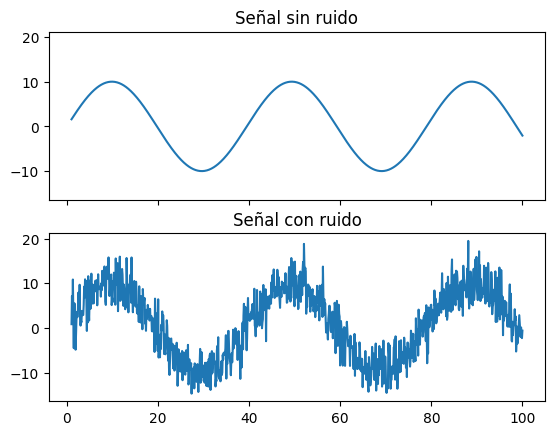

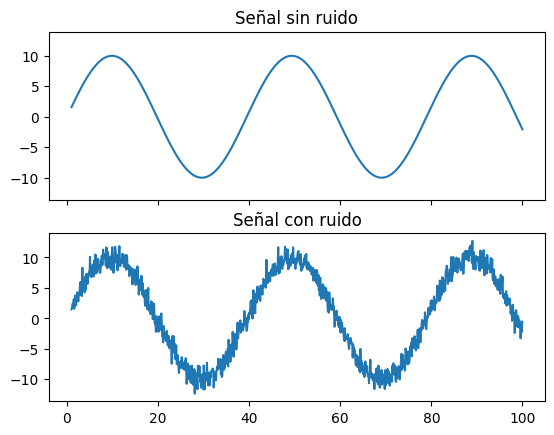

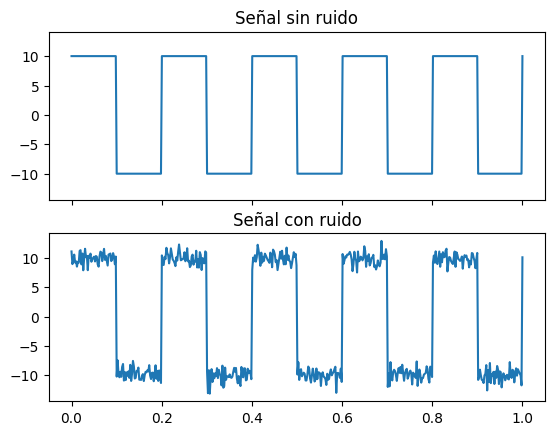

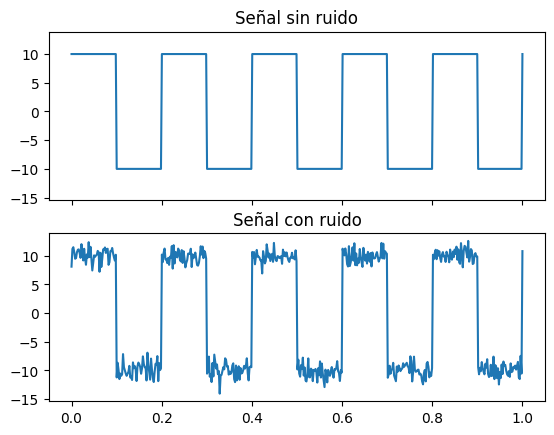

In [83]:
# Actividad 2

# Creación de la interfaz

# Crea un widget de selección tipo Dropdown y le pone las opciones deseadas.
widgetDropdownSignal = widgets.Dropdown(options=['Senoidal','Cuadrada','Sierra'],
                                  disable=False)

widgetSliderNoise = widgets.IntSlider(
    value=10,
    min=1,
    max=20,
    step=1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

out2 = widgets.Output()

#Curvas

def createCurves(m, b):

  t = np.linspace(0, 1, 500)
  tsin = np.linspace(1, 100, 1000)

  Curvedict = {
  "Senoidal": 10*np.sin(tsin/(2*np.pi)),
  "Cuadrada": 10*signal.square(2 * np.pi * 5 * t),
  "Sierra": 10*signal.sawtooth(2 * np.pi * 5 * t)}

  x_volts = Curvedict[str(m)]
  x_watts = x_volts ** 2

  target_noise_db = b
  # Convert to linear Watt units
  target_noise_watts = 10 ** (target_noise_db / 10)

  # Generate noise samples
  mean_noise = 0
  noise_volts = np.random.normal(mean_noise, np.sqrt(target_noise_watts), len(x_watts))

  # Noise up the original signal (again) and plot
  y_volts = x_volts + noise_volts


  fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

  if m =='Senoidal':
    axs[0].plot(tsin, x_volts)
    axs[0].set_title('Señal sin ruido')
    axs[1].plot(tsin, y_volts)
    axs[1].set_title('Señal con ruido')

  else:
    axs[0].plot(t, x_volts)
    axs[0].set_title('Señal sin ruido')
    axs[1].plot(t, y_volts)
    axs[1].set_title('Señal con ruido')

ui = widgets.HBox([widgets.VBox([widgets.Label("Curvas a elegir:"),
                                widgetDropdownSignal, widgets.Label(' ')]),
                   widgets.VBox([widgets.Label("Nivel de ruido:"),
                   widgetSliderNoise, widgets.Label(' ')])])

output = widgets.interactive_output(createCurves, {'m': widgetDropdownSignal, 'b': widgetSliderNoise})

display(ui, output)

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

# Actividad 3

In [ ]:
#Actividad 3.1: Cálculo de ruido térmico

#Creación de la interfaz
widgetText = widgets.Text(value='1',
                          placeholder='Type something',
                          description='',
                          disabled=False)

widgetText2 = widgets.Text(value='',
                          placeholder='Respuesta',
                          description='',
                          disabled=False)

widgetButton = widgets.Button(description='Obtener respuesta',
                              disabled=False,
                              tooltip='Click me',
                              icon='check')

output = widgets.Output()

header = widgets.HTML("<h1>Conversión de ruido térmico</h1>", layout=widgets.Layout(height='auto'))
header.style.text_align='center'

widgetsLayout = widgets.AppLayout(header=header,
                                  left_sidebar=widgets.VBox([widgets.Label("Ingrese la temperatura (°C):"),
                                                widgetText,
                                                widgets.Label("Ingrese el valor del ancho de banda:"),
                                                widgetText2]),
                                  right_sidebar=widgets.VBox([widgets.Label("Valor"),
                                                widgetButton]))

display(widgetsLayout, output)

def convert(T,B):
  T = float(T)
  B = float(B)
  #Se define la constante de Boltzmann
  K = 1.38*(10**-23)

  #Es importante recordar que T(K) = C + 273
  Tk = T + 273

  #Se calcula el ruido térmico con N = K*T*B
  N = K * Tk * B

  return N


#Evento botón
def on_button_clicked(b):

  try:
    float(widgetText.value)
    result = convert(widgetText.value, widgetText2.value)
    with output:
        print(result)

  except ValueError:
    widgetText.value='Por favor indique un valor numérico'
    with output:
        print(widgetText.value)

  try:
    float(widgetText2.value)
    result = convert(widgetText.value, widgetText2.value)
    with output:
        print(result)

  except ValueError:
    widgetText2.value='Por favor indique un valor numérico'
    with output:
        print(widgetText.value)
widgetButton.on_click(on_button_clicked)

AppLayout(children=(HTML(value='<h1>Conversión de ruido térmico</h1>', layout=Layout(grid_area='header', heigh…

Output()

# Referencias
#### [1] https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#text
#### [2] https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#dropdown
#### [3] https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#button
#### [4] https://ipywidgets.readthedocs.io/en/stable/examples/Layout%20Templates.html#applayout
#### [5] https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#vbox
#### [6] https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#tabs
#### [7] M. Felipe, "Decibeles en las comunicaciones", material de clase, Cartago, Costa Rica, 2024.
#### [8] T. Wayne, Sistemas de Comunicaciones Electrónicas, 4ta ed., México: Pearson Educación, 2003.